In [14]:
from scipy.integrate import trapezoid, simpson
import numpy as np

# Function to integrate

def objective(x):
  return np.exp(2*x)*np.sin(3*x)

x_ = np.linspace(0, 2, 200)
y = objective(x_)

print("梯形法则：", trapezoid(y, x_))

print("simpson: ",simpson(y, x=x_))

梯形法则： -14.212935426665759
simpson:  -14.213976546527679


In [19]:
import scipy.interpolate as interpolate

x_nodes = np.array([0, 1, 2])
y_nodes = objective(x_nodes)

# 计算拉格朗日插值多项式
lagrange_poly = interpolate.lagrange(x_nodes, y_nodes)
print("插值节点：", x_nodes)
print("节点对应的函数值：", y_nodes)
print("拉格朗日插值多项式：")
print(lagrange_poly)
# 显示多项式系数
print("多项式系数（从最高次到常数项）：", lagrange_poly.coef)

lagrange_poly_func=lambda x: lagrange_poly.coef[0]*x*x+lagrange_poly.coef[1]*x+lagrange_poly.coef[2]
y_lagrange_poly=lagrange_poly_func(x_)
print("simpson: ",simpson(y_lagrange_poly, x=x_))

插值节点： [0 1 2]
节点对应的函数值： [  0.           1.04274366 -15.25556929]
拉格朗日插值多项式：
        2
-8.671 x + 9.713 x
多项式系数（从最高次到常数项）： [-8.6705283   9.71327196  0.        ]
simpson:  -3.6948648891023597


In [42]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sp

# 求解方程组 Ax=b 的解
def solve_linear_system(A, b):
    return np.linalg.solve(A, b)
# 矩阵的条件数
def matrix_condition_number(A, p=None):
    return np.linalg.cond(A,p=p)

A=np.array([[4,2,-2],
            [1,1,1],
            [2,2,4]])
b=np.array([4,2,5]).T
x=solve_linear_system(A,b)
print(x)
print(matrix_condition_number(A, p=2))

def gauss_seidel_iteration(A, b, x0, tol=1e-6, max_iter=10000):
    n = len(b)
    x = x0.copy()
    x_last = x0.copy()
    converged = False
    for k in range(max_iter):
        for i in range(n):
            sigma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - sigma) / A[i, i]
        if np.linalg.norm(x - x_last) < tol:
            converged = True
            break
        x_last = x.copy()
    return x, k + 1, converged

x,k,converged=gauss_seidel_iteration(A, b.T, np.ones(3), tol=1e-6, max_iter=5)
print(x,k,converged)

# 矩阵的特征值
def matrix_eigenvalues(A):
    return np.linalg.eigvals(A)

# 提取对角阵
def extract_diagonal_matrix(A):
    return np.diag(np.diag(A))

# 提取上下三角矩阵
def extract_triangular_matrices(A):
    return np.tril(A), np.triu(A)

D=np.diag(np.diag(A))
L=-np.tril(A)+D
U=-np.triu(A)+D
B=np.dot(la.inv(D-L),U)


print("D:\n", D)
print("L:\n", L)
print("U:\n", U)

print(B)

print(matrix_eigenvalues(U))

[1.  0.5 0.5]
34.55112166226203
[1.1875   0.28125  0.515625] 5 False
D:
 [[4 0 0]
 [0 1 0]
 [0 0 4]]
L:
 [[ 0  0  0]
 [-1  0  0]
 [-2 -2  0]]
U:
 [[ 0 -2  2]
 [ 0  0 -1]
 [ 0  0  0]]
[[ 0.  -0.5  0.5]
 [ 0.   0.5 -1.5]
 [ 0.   0.   0.5]]
[0. 0. 0.]


In [44]:
import numpy as np
from scipy.optimize import linprog

c = -5*np.array([3,5,4])
bounds=[(0, 10000),(0, 10000),(0, 10000)]
A1_ub=np.array([[2,3,0],[0,2,4],[3,2,5]])
b1_ub=np.array([1500,800,2000])
q1=linprog(c, A_ub=A1_ub, b_ub=b1_ub, bounds=bounds, method='highs')
print(q1)

bounds2=[(0, 10000),(0, 10000),(100, 10000)]
q2=linprog(c, A_ub=A1_ub, b_ub=b1_ub, bounds=bounds2, method='highs')
print(q2)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -13375.0
              x: [ 3.750e+02  2.500e+02  7.500e+01]
            nit: 3
          lower:  residual: [ 3.750e+02  2.500e+02  7.500e+01]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [ 9.625e+03  9.750e+03  9.925e+03]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [-5.250e+00 -3.125e+00 -1.500e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -12500.0
              x: [ 3.667e+02  2.000e+02  1.000e+02]
            nit: 2
          lower:  residual: [ 3.667e+02  2.000e+02  0.000e+00

[  1   9  25  49 100 169 225 324 400]
----------------------------------------start----------------------------------------
回归系数 β0: 0.7472427783763749, β1: [0.25389003]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           2.47e-12
Time:                        00:44:29   Log-Likelihood:                -11.940
No. Observations:                   9   AIC:                             27.88
Df Residuals:                       7   BIC:                             28.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

/home/yux/codes/math-exam/mathematical_exp/.conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


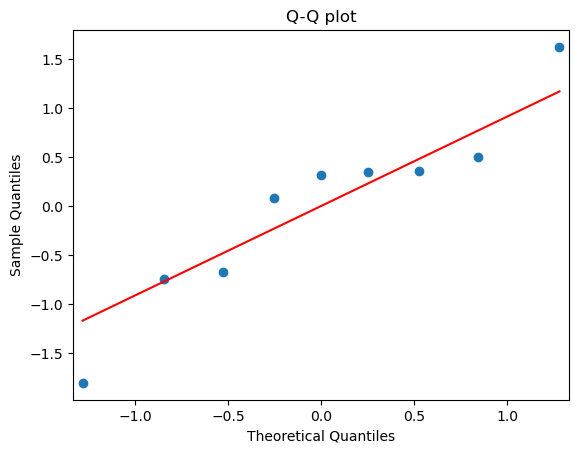

残差的平方和 (RSS): 7.482541139277972
自由度 (dof): 7.0
剩余方差: 1.0689344484682817
lower_bound -1.4997903631053517 upperbound 1.4997903631053517
----------------------------------------end----------------------------------------


In [55]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import statsmodels.formula.api as smf
import seaborn as sns

ALPHA=0.1
dataset={
  'v':[1,3,5,7,10,13,15,18,20],
  'f':[0.26,2.36,7.45,13.27,26.48,44.15,58.19,84.63,100.5]
}


# x_1_times_x_2 = np.array(dataset['x_1']) * np.array(dataset['x_2'])
# x_1_times_x_3 = np.array(dataset['x_1']) * np.array(dataset['x_3'])
# x_2_times_x_3 = np.array(dataset['x_2']) * np.array(dataset['x_3'])
v_squared = np.array(dataset['v']) * np.array(dataset['v'])
print(v_squared)
# x_2_squared = np.array(dataset['x_2']) * np.array(dataset['x_2'])


X=np.array([v_squared]).T
y=np.array(dataset['f'])

# X=np.delete(X,0,axis=0)
# y=np.delete(y,0,axis=0)

def linear_regression(X, y):
  print("----------------------------------------start----------------------------------------")

  # 线性回归模型
  model = LinearRegression()
  model.fit(X, y)

  # 回归系数
  beta_0 = model.intercept_
  beta_1 = model.coef_

  print(f'回归系数 β0: {beta_0}, β1: {beta_1}')

  # 添加常数项（截距）
  X_const = sm.add_constant(X)

  # 使用statsmodels
  ols_model = sm.OLS(y, X_const).fit()
  print(ols_model.summary())

  # 置信区间
  conf = ols_model.conf_int(alpha=ALPHA)
  print(f'置信区间: \n{conf}')

  # 计算残差
  residuals = ols_model.resid
  print(f'残差: \n{residuals}')

  residuals_ci=stats.t.interval(confidence=1-ALPHA, df=len(residuals),
              loc=np.mean(residuals),
              scale=stats.sem(residuals))


  print(f'残差的置信区间: \n{residuals_ci}')


  # # 绘制残差图
  # sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
  # plt.xlabel('Fitted values')
  # plt.ylabel('Residuals')
  # plt.title('Residuals vs Fitted')
  # plt.show()

  # 绘制标准化残差Q-Q图
  sm.qqplot(residuals, line='s')
  plt.title('Q-Q plot')
  plt.show()

  # 计算残差的平方和
  RSS = np.sum(residuals**2)

  # 自由度
  dof = ols_model.df_resid

  # 计算剩余方差
  residual_variance = RSS / dof

  print(f'残差的平方和 (RSS): {RSS}')
  print(f'自由度 (dof): {dof}')
  print(f'剩余方差: {residual_variance}')

  residual_std = np.std(residuals)
  z_score = stats.norm.ppf(1-ALPHA / 2)  # 两侧的z值

  # 计算上下界
  lower_bound = -z_score * residual_std
  upper_bound = z_score * residual_std

  print("lower_bound",lower_bound,"upperbound",upper_bound,)

  print("----------------------------------------end----------------------------------------")
  return ols_model,beta_0,beta_1

ols_model,beta_0,beta_1=linear_regression(X,y)
